<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Stationarity</a></span></li><li><span><a href="#Differencing" data-toc-modified-id="Differencing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Differencing</a></span><ul class="toc-item"><li><span><a href="#Log-Returns" data-toc-modified-id="Log-Returns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Log Returns</a></span></li></ul></li><li><span><a href="#Fractional-difference(실수-차원의-차분-시계열)" data-toc-modified-id="Fractional-difference(실수-차원의-차분-시계열)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fractional difference(실수 차원의 차분 시계열)</a></span><ul class="toc-item"><li><span><a href="#Optimize" data-toc-modified-id="Optimize-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Optimize</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Example</a></span><ul class="toc-item"><li><span><a href="#Conclude" data-toc-modified-id="Conclude-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclude</a></span></li></ul></li><li><span><a href="#번외)-분/틱-데이터-정상성" data-toc-modified-id="번외)-분/틱-데이터-정상성-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>번외) 분/틱 데이터 정상성</a></span><ul class="toc-item"><li><span><a href="#Conclude" data-toc-modified-id="Conclude-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Conclude</a></span></li></ul></li><li><span><a href="#Ref" data-toc-modified-id="Ref-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ref</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Stationarity
    : 시계열의 통계적 특성이 시간의 흐름에 따라 변하지 않는다

시계열 분석 등 금융 도메인에서는 대부분 stationary 시계열을 대상으로 분석한다. 예를 들어 시계열 분석의 AR, MA, ARMA 등은 stationary 시계열을 대상으로 한다. ARIMA 모형은 non-stationary 분석용 모델이지만 non-stationary 시계열을 차분해서 stationary 시계열로 변환한 후 stationary 모형 (ARMA)으로 분석한 다음 차분 시계열을 다시 누적해서 원 시계열로 복원한다. 즉 ARIMA 모형도 내부적으로는 stationary 시계열을 대상으로 한다. 금융공학에서도 정규분포로 가정한 수익률을 분석하고 있다.

- non-stationary
    - 눈에띄는 긴 주기를 갖는 상향 또는 하향 추세가 존재
    - 갑작스럽고 예측할 수 없는 방향 변화가 존재


- 정상성을 통해 얻을 수 있는 이점
    - 예측 효과 증가(예측 범위가 무한대에서 일정 범위로 줄어들기 때문)
    - 파라미터의 수가 감소하여 단순한 알고리즘을 사용할 수 있으며, 이로 인해서 overfitting 방지

# Differencing

In [2]:
df = fdr.DataReader('aapl', '2019').dropna()
df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-01-02,39.48,38.72,39.71,38.56,148160000.0,0.0010
2019-01-03,35.55,35.99,36.43,35.50,365250000.0,-0.0995
2019-01-04,37.06,36.13,37.14,35.95,234430000.0,0.0425
2019-01-07,36.98,37.17,37.21,36.48,219110000.0,-0.0022
2019-01-08,37.69,37.39,37.95,37.13,164100000.0,0.0192
...,...,...,...,...,...,...
2021-12-31,177.57,178.09,179.23,177.26,64060000.0,-0.0035
2022-01-03,182.01,177.83,182.88,177.71,96490000.0,0.0250
2022-01-04,179.70,182.63,182.94,179.12,92660000.0,-0.0127


주가 차트는 비정상성 (non-stationary)을 갖는 시계열이다. 주가의 평균, 분산 등의 확률구조는 시간에 따라 달라진다. 확률구조가 계속 변하기 때문에 이를 제대로 분석할 모형을 만들기 어렵다. 메모리를 잘 분석하면 미래를 예측할 수 있겠지만 주가의 non-stationary 특성 때문에 미래를 예측하는 것은 어렵다.

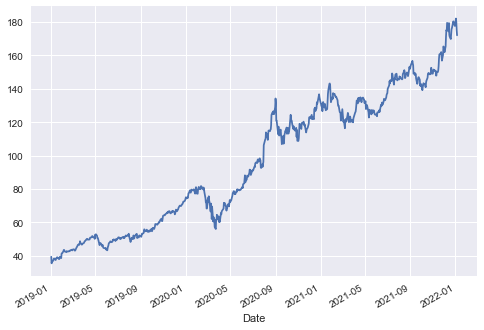

In [4]:
close = df.Close.dropna()
close.plot();

## Log Returns

로그 같은 변환은 시계열의 분산 변화를 일정하게 만드는데 도움이 될 수 있다. 차분(differencing)은 시계열의 수준에서 나타나는 변화를 제거하여 시계열의 평균 변화를 일정하게 만드는데 도움이 될 수 있다. 결과적으로 추세나 계절성이 제거(또는 감소)된다.

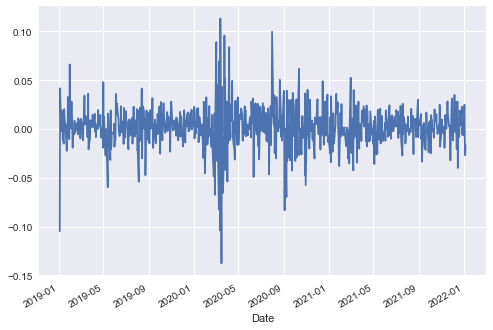

In [5]:
lret = np.log(close.pct_change() + 1)[1:]
lret.plot();

수익률 시계열은 과거를 기억하지 못한다. 수익률은 주가를 차분한 것으로 주가가 가지고 있는 메모리를 모두 지워 버린다. 반면에 수익률은 정상성을 갖는 (stationary) 시계열이다. 수익률의 평균은 0에 가깝고 시간에 따라 변하지 않는다. 분산 (변동성)은 시간에 따라 높을 때도 있고, 낮을 때도 있다 (이분산성). 정상성을 갖는 시계열은 분석이 용이하지만 메모리가 지워졌기 때문에 장기 기억을 분석할 수 없다.

In [6]:
from statsmodels.tsa.stattools import adfuller

adfuller(close)[1]
adfuller(lret)[1]

0.9466572720312303

4.669508831043792e-14

# Fractional difference(실수 차원의 차분 시계열)

**메모리에 대해서는 주가를 분석하는 것이 유용하겠지만 주가는 stationary하지 않기 때문에 분석이 용이하지 않다. 반면에 수익률은 stationary하기 때문에 분석이 용이하지만 메모리가 없기 때문에 유용한 분석을 할 수 없다. 이런 현상을 주가-수익률의 딜레마라 할 수 있다.**

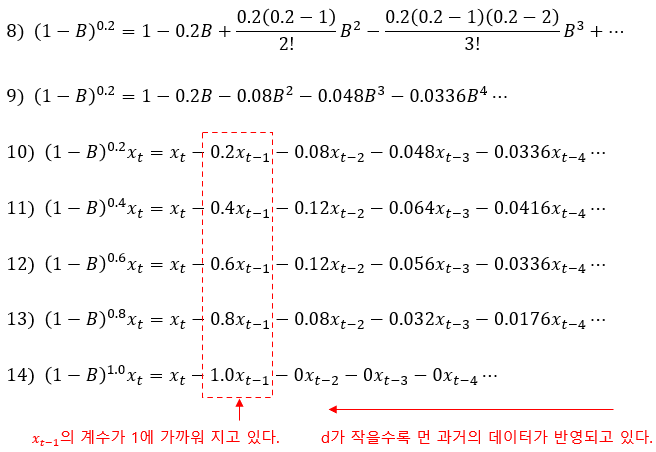
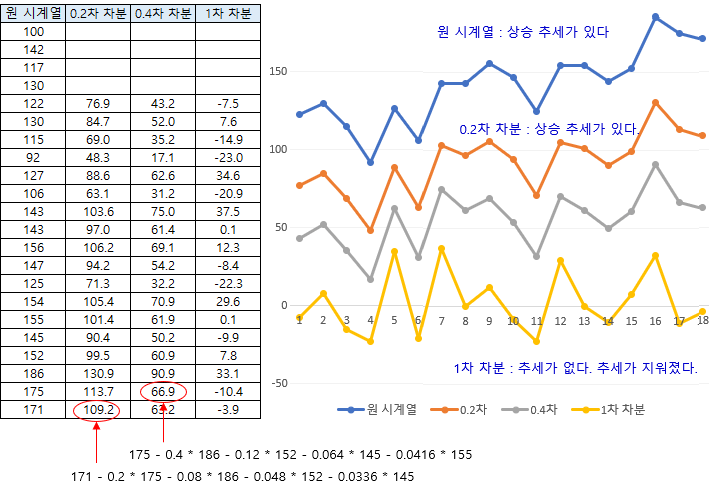

주가의 메모리를 가능한 보존하면서 stationary한 차분 시계열을 생성하고, 이것을 머신러닝의 features로 사용할 것을 제안하고 있다.

Correlation: 
 [[1.         0.95479498]
 [0.95479498 1.        ]]
ADF Test: 0.6987815896664158


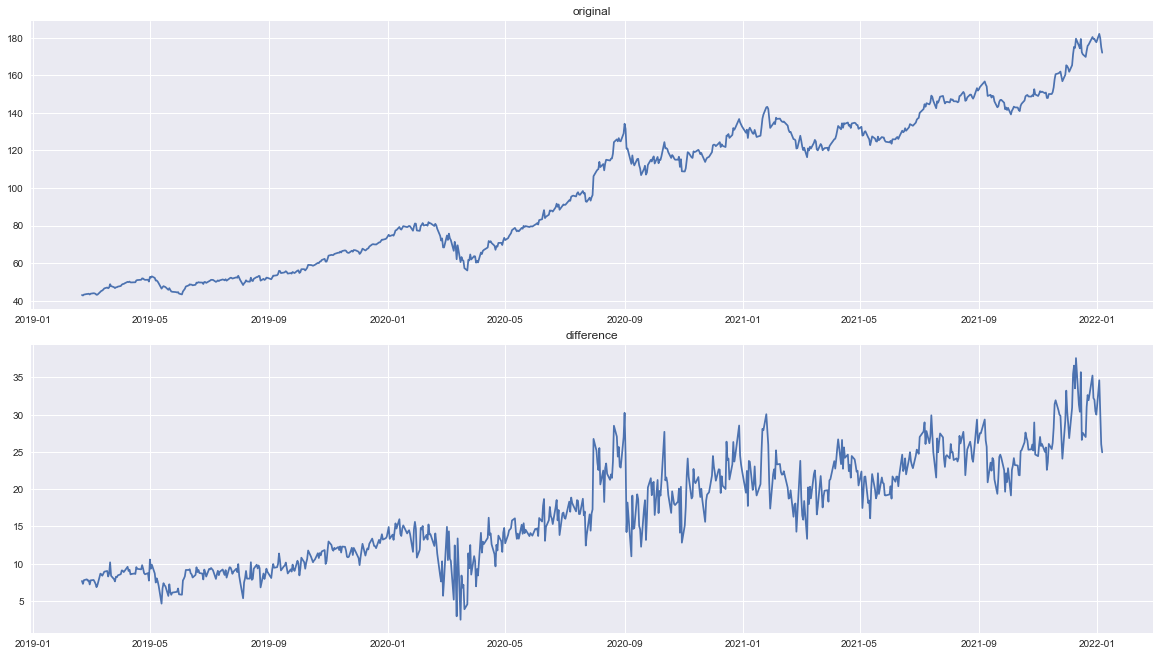

In [178]:
# (1-B)^d의 이항급수 (binomial series) 계수 (w)를 구한다.
# w의 inverse를 계산한다.
def getWeights_FFD(d, size, thres):
    w = [1.]    # w의 초깃값 = 1
    for k in range(1, size):
        w_ = -w[-1] * (d - k + 1) / k      # 식 2)를 사용했다.
        if abs(w[-1]) >= thres and abs(w_) <= thres: break
        else: w.append(w_)
    # w의 inverse
    w = np.array(w[::-1]).reshape(-1, 1)
    return w


def frac_diff(series, d=0.4, thres = 0.002):
    '''
    Constant width window (new solution)
    Note 1: thres determines the cut-off weight for the window
    Note 2: d can be any positive fractional, not necessarily bounded [0,1]
    Return: differenced serise[Serise], weights[list]
    '''
    # 1) Compute weights for the longest series
    w = getWeights_FFD(d, series.shape[0], thres)
    width = len(w) - 1
    
    # 2) Apply weights to values
    tmp = {}
    for iloc1 in range(width, series.shape[0]):
        loc0 = series.index[iloc1 - width]
        loc1 = series.index[iloc1]
        if not np.isfinite(series.loc[loc1]):
            continue   # exclude NAs
        tmp[loc1] = np.dot(w.T, series.loc[loc0:loc1])[0]
    return pd.Series(tmp), w


# 주가 시계열을 읽어온다.
stock = close
fdiff, w = frac_diff(stock, d=0.4)


# 원 시계열
fig, ax = plt.subplots(2, figsize=(16,9), constrained_layout=True)
ax[0].plot(stock.iloc[(len(w) - 1):])
ax[0].set_title('original')
# 실수 차원의 차분 시계열
ax[1].plot(fdiff)
ax[1].set_title('difference')


# correlation
print('Correlation: \n', np.corrcoef(fdiff, stock.iloc[(len(w) - 1):]));
print('ADF Test:', adfuller(fdiff)[1]);

## Optimize

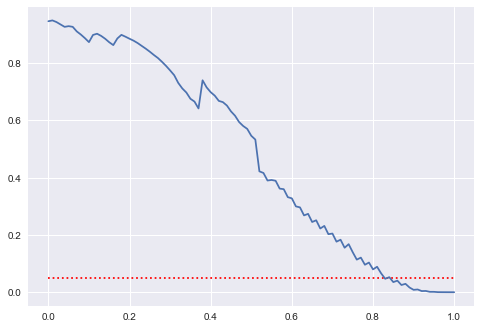

In [125]:
## close

adf_close = {}
for d in np.arange(0, 1.01, 0.01):
    d = round(d,2)
    f_diff, w = frac_diff(close, d)
    adf_close[d] = adfuller(f_diff)[1]
    # print(f'd={d:.2f}: {adf_close[d]:.5}')

plt.plot(range(2),[0.05]*2, ':r')
plt.plot(pd.Series(adf_close));

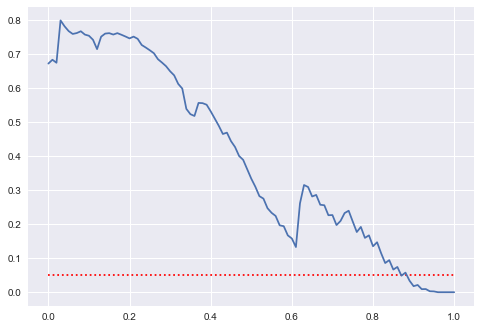

In [126]:
## close_log

close_log = np.log(close)

adf_log = {}
for d in np.arange(0, 1.01, 0.01):
    d = round(d,2)
    f_diff, w = frac_diff(close_log, d)
    adf_log[d] = adfuller(f_diff)[1]
    # print(f'd={d:.2f}: {adf_log[d]:.5}')

plt.plot(range(2),[0.05]*2, ':r')
plt.plot(pd.Series(adf_log));

# Example

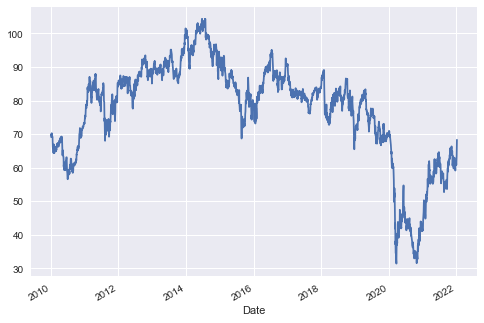

In [147]:
xom = fdr.DataReader('xom', '2010').Close.dropna()
xom
xom.plot();

Correlation: 
 [[1.         0.92163441]
 [0.92163441 1.        ]]
ADF Test: 0.01988902083346374


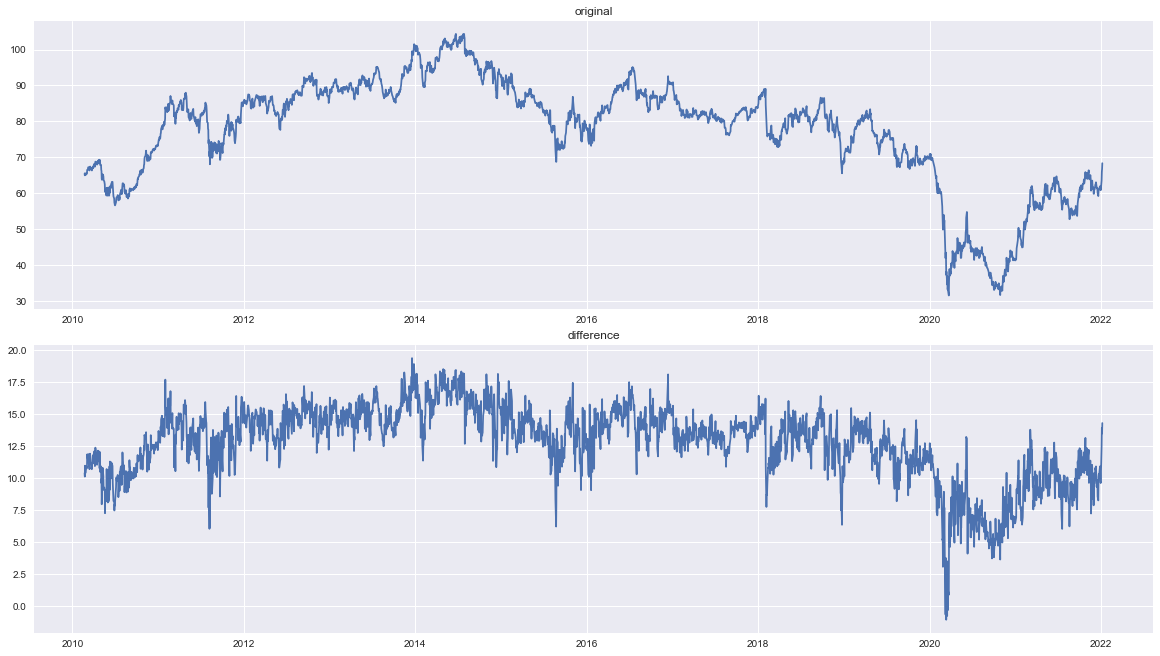

In [148]:
# 주가 시계열을 읽어온다.
stock = xom
fdiff, w = frac_diff(stock, d=0.4)


# 원 시계열
fig, ax = plt.subplots(2, figsize=(16,9), constrained_layout=True)
ax[0].plot(stock.iloc[(len(w) - 1):])
ax[0].set_title('original')
# 실수 차원의 차분 시계열
ax[1].plot(fdiff)
ax[1].set_title('difference')


# correlation
print('Correlation: \n', np.corrcoef(fdiff, stock.iloc[(len(w) - 1):]));
print('ADF Test:', adfuller(fdiff)[1]);

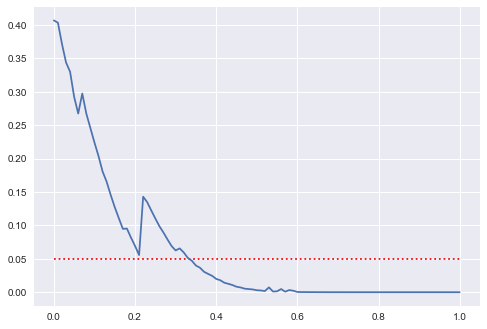

In [149]:
## xom

adf_xom = {}
for d in np.arange(0, 1.01, 0.01):
    d = round(d,2)
    f_diff, w = frac_diff(xom, d)
    adf_xom[d] = adfuller(f_diff)[1]
    # print(f'd={d:.2f}: {adf_xom[d]:.5}')

plt.plot(range(2),[0.05]*2, ':r')
plt.plot(pd.Series(adf_xom));

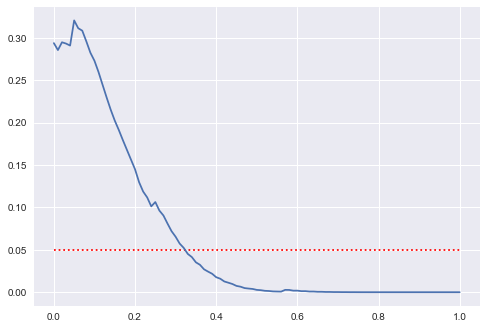

In [150]:
## xom_log

xom_log = np.log(xom)

adf_xom_log = {}
for d in np.arange(0, 1.01, 0.01):
    d = round(d,2)
    f_diff, w = frac_diff(xom_log, d)
    adf_xom_log[d] = adfuller(f_diff)[1]
    # print(f'd={d:.2f}: {adf_xom_log[d]:.5}')

plt.plot(range(2),[0.05]*2, ':r')
plt.plot(pd.Series(adf_xom_log));

## Conclude

- 애플(2019~) 주가는 급격히 오르는 모습을 보여 d=0.9 근처에서 p_value가 0.05 이하로 떨어져 정상성을 보인다.
- 엑슨모빌(2010~) 주가는 애플과 다른 양상을 보이는데, d=0.3 부근부터 정상성을 띈다.

# 번외) 분/틱 데이터 정상성

**일별 종가가 stationary하지 않을때, 더 낮은 타임 인터벌의 가격은 stationary할까??**

In [152]:
from alpha_vantage.timeseries import TimeSeries

ADF Test: 0.5175734606537905


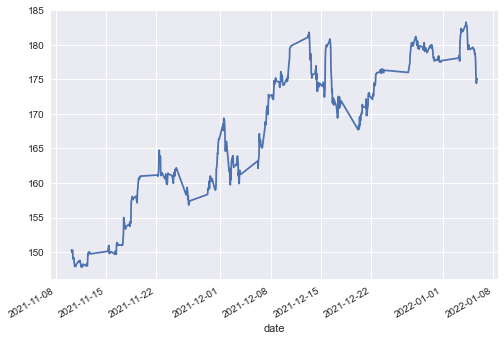

In [156]:
## 60m
data_60m, _ = TimeSeries('YOUR_API_KEY', 'pandas').get_intraday('aapl','60min','full')
data_60m['4. close'].plot()
data_60m = data_60m['4. close'].dropna()[::-1]
print('ADF Test:', adfuller(data_60m)[1]);

In [176]:
## aapl

import time

for t in [60,30,15,5,1]:
    data = TimeSeries('YOUR_API_KEY', 'pandas').get_intraday('aapl', f'{t}min', 'full')[0]['4. close'].dropna()[::-1]
    print(f'{t:2}min: {adfuller(data)[1]:.5f}');
    time.sleep(.5)

60min: 0.51757
30min: 0.40592
15min: 0.40009
 5min: 0.19575
 1min: 0.86271


In [177]:
## xom

for t in [60,30,15,5,1]:
    data = TimeSeries('YOUR_API_KEY', 'pandas').get_intraday('xom', f'{t}min', 'full')[0]['4. close'].dropna()[::-1]
    print(f'{t:2}min: {adfuller(data)[1]:.5f}');
    time.sleep(.5)

60min: 0.42839
30min: 0.88081
15min: 0.87167
 5min: 0.98560
 1min: 0.99387


## Conclude

- 60~1 min 인터벌 간의 adfuller 테스트 결과를 통해 타임인터벌과 stationary의 연관을 찾을 수 없다.

# Ref

1. 아마퀀트 
- https://blog.naver.com/chunjein/222071363797
2. Forecasting: Principles and Practice | Rob J Hyndman and George Athanasopoulos
- https://otexts.com/fppkr/stationarity.html#fnref15